# AI vs Human Text Classifier (Portfolio-Ready)

Classify text as **AI-generated** vs **Human-written** using **TF-IDF** features and linear models (Logistic Regression & Linear SVC).
This notebook is designed to be clean, reproducible, and easy to read on GitHub.

## Project Overview
**Goal:** Build a simple but strong baseline that detects whether text is AI-generated or human-written.

**Highlights**
- Clear, reproducible pipeline
- TF-IDF features with uni/bi-grams
- Baseline vs. tuned model comparison
- Confusion matrix & metrics
- Saved, ready-to-use model

## Setup
Place the dataset CSV in the same folder as this notebook with the name:
```
ai_vs_human_text.csv
```
> Kaggle dataset example: *AI vs Human Text Dataset* by **shamimhasan8**.

In [13]:
# Imports
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Make plots a bit cleaner
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 120
sns.set(style="whitegrid")

##  Load Data

In [3]:
# Adjust the path if needed
FILE_PATH = "/Users/miladutton/Desktop/CSS/Python/AiText/ai_vs_human_text.csv"

df_raw = pd.read_csv(FILE_PATH)
print("Loaded:", df_raw.shape)
df_raw.head()

Loaded: (1000, 6)


,id,text,label,prompt,model,date
0,1,AI-generated content sample 1: This is an exam...,AI-generated,Explain the benefits of deep learning.,ChatGPT,2023-11-25
1,2,AI-generated content sample 2: This is an exam...,AI-generated,Write an article on the future of AI.,Bard,2024-11-15
2,3,Human-written text sample 3: This is an exampl...,Human-written,Editorial on the impact of technology in society.,Human,2024-08-11
3,4,AI-generated content sample 4: This is an exam...,AI-generated,Describe how neural networks work.,Claude,2024-04-27
4,5,Human-written text sample 5: This is an exampl...,Human-written,Personal essay on learning programming.,Human,2024-08-15


## Quick Data Check

In [4]:
df_raw.info()
df_raw.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   text    1000 non-null   object
 2   label   1000 non-null   object
 3   prompt  1000 non-null   object
 4   model   1000 non-null   object
 5   date    1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


,id,text,label,prompt,model,date
521,522,Human-written text sample 522: This is an exam...,Human-written,Interview with an AI researcher.,Human,2025-05-14
737,738,Human-written text sample 738: This is an exam...,Human-written,Interview with an AI researcher.,Human,2024-12-10
740,741,AI-generated content sample 741: This is an ex...,AI-generated,Generate a creative story about machine learning.,Claude,2024-06-21
660,661,AI-generated content sample 661: This is an ex...,AI-generated,Describe how neural networks work.,ChatGPT,2024-10-31
411,412,Human-written text sample 412: This is an exam...,Human-written,Personal essay on learning programming.,Human,2025-06-16


## Clean & Normalize
We keep only `text` and `label` columns and map labels to `ai` / `human`.

In [5]:
# Expect columns: 'text', 'label' with values like 'AI-generated' / 'Human-written'
assert {'text','label'}.issubset(df_raw.columns), "Expected 'text' and 'label' columns."

df = df_raw[['text','label']].copy()

# Standardize labels
df['label'] = (
    df['label'].astype(str).str.strip().str.lower()
      .map({'ai-generated':'ai', 'human-written':'human', 'ai':'ai', 'human':'human'})
)

# Drop missing or too short
df = df.dropna(subset=['text','label'])
df['text'] = df['text'].astype(str).str.strip()
df = df[df['text'].str.len() >= 5]

print("Class balance:\n", df['label'].value_counts())
print("Clean shape:", df.shape)

Class balance:
 label
ai       507
human    493
Name: count, dtype: int64
Clean shape: (1000, 2)


##  Train / Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'],
    test_size=0.2, random_state=42, stratify=df['label']
)
print(f"Train/Test sizes: {len(X_train)} / {len(X_test)}")

Train/Test sizes: 800 / 200


## Baseline Models
Train **Logistic Regression** and **Linear SVC** with the same TF‑IDF features.

In [7]:
pipe_lr = Pipeline([
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words="english", ngram_range=(1,2), min_df=2)),
    ("clf", LogisticRegression(max_iter=500))
])

pipe_svc = Pipeline([
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words="english", ngram_range=(1,2), min_df=2)),
    ("clf", LinearSVC())
])

pipe_lr.fit(X_train, y_train)
pipe_svc.fit(X_train, y_train)

print("Accuracy (train/test)")
print("  LogisticRegression:", round(pipe_lr.score(X_train, y_train),3), "/", round(pipe_lr.score(X_test, y_test),3))
print("  LinearSVC        :", round(pipe_svc.score(X_train, y_train),3), "/", round(pipe_svc.score(X_test, y_test),3))

Accuracy (train/test)
  LogisticRegression: 1.0 / 1.0
  LinearSVC        : 1.0 / 1.0


## Evaluation
Classification report and confusion matrix for both models.


=== Logistic Regression (baseline) ===
              precision    recall  f1-score   support

          ai      1.000     1.000     1.000       101
       human      1.000     1.000     1.000        99

    accuracy                          1.000       200
   macro avg      1.000     1.000     1.000       200
weighted avg      1.000     1.000     1.000       200



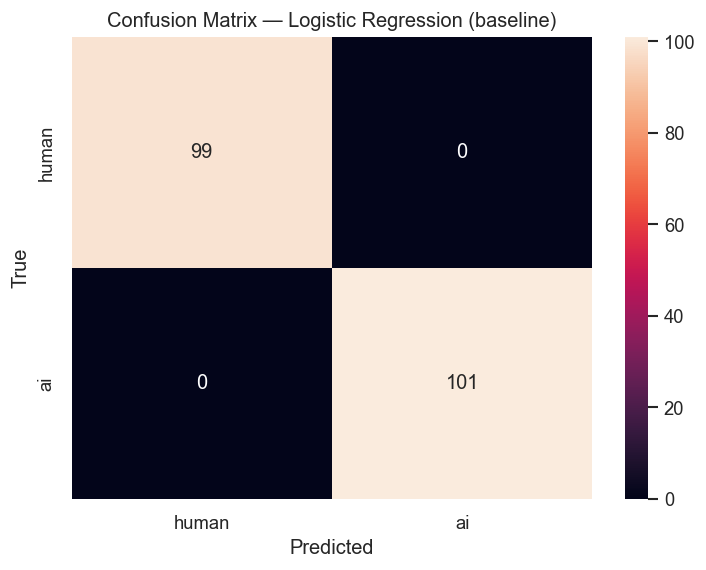


=== Linear SVC (baseline) ===
              precision    recall  f1-score   support

          ai      1.000     1.000     1.000       101
       human      1.000     1.000     1.000        99

    accuracy                          1.000       200
   macro avg      1.000     1.000     1.000       200
weighted avg      1.000     1.000     1.000       200



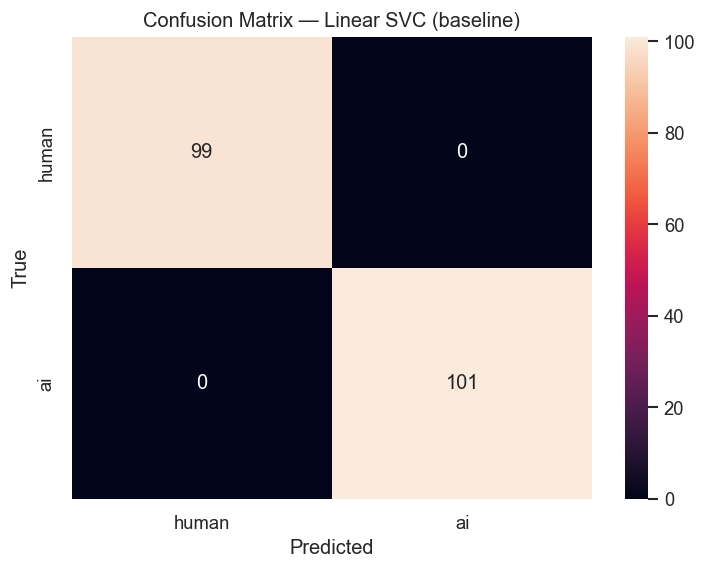

In [8]:
def evaluate(model, X_te, y_te, title):
    preds = model.predict(X_te)
    print(f"\n=== {title} ===")
    print(classification_report(y_te, preds, digits=3))
    cm = confusion_matrix(y_te, preds, labels=['human','ai'])
    ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=['human','ai'], yticklabels=['human','ai'])
    ax.set_title(f'Confusion Matrix — {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    plt.show()

evaluate(pipe_lr,  X_test, y_test, "Logistic Regression (baseline)")
evaluate(pipe_svc, X_test, y_test, "Linear SVC (baseline)")

##  Hyperparameter Tuning (Linear SVC)
We tune `C`, `min_df`, and the n‑gram range.

In [12]:
grid = {
    "tfidf__ngram_range": [(1,1),(1,2)],
    "tfidf__min_df": [1,2,3],
    "clf__C": [0.25, 1.0, 2.0, 4.0],
}

gs = GridSearchCV(pipe_svc, grid, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

print("Best CV:", round(gs.best_score_, 4))
print("Best params:", gs.best_params_)
print("Test acc (best):", round(gs.best_estimator_.score(X_test, y_test), 4))

best_model = gs.best_estimator_

Best CV: 1.0
Best params: {'clf__C': 0.25, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Test acc (best): 1.0


## Most Informative N‑grams
Peek at which n‑grams push the model toward each class.

In [10]:
# Works for linear models with TF-IDF
vect = best_model.named_steps['tfidf']
clf  = best_model.named_steps['clf']

feature_names = np.array(vect.get_feature_names_out())
coefs = clf.coef_[0]
classes = clf.classes_
print("Classes order:", classes)

top_pos = np.argsort(coefs)[-15:][::-1]  # toward classes[1]
top_neg = np.argsort(coefs)[:15]         # toward classes[0]

print(f"\nTop n-grams → {classes[1]}:\n", list(zip(feature_names[top_pos], np.round(coefs[top_pos], 3))))
print(f"\nTop n-grams → {classes[0]}:\n", list(zip(feature_names[top_neg], np.round(coefs[top_neg], 3))))

Classes order: ['ai' 'human']

Top n-grams → human:
 [('written', np.float64(1.229)), ('human', np.float64(1.229)), ('researcher', np.float64(0.38)), ('interview', np.float64(0.38)), ('text', np.float64(0.357)), ('personal', np.float64(0.285)), ('programming', np.float64(0.285)), ('essay', np.float64(0.285)), ('conference', np.float64(0.234)), ('report', np.float64(0.234)), ('industry', np.float64(0.234)), ('society', np.float64(0.212)), ('editorial', np.float64(0.212)), ('impact', np.float64(0.212)), ('technology', np.float64(0.212))]

Top n-grams → ai:
 [('generated', np.float64(-1.217)), ('content', np.float64(-0.609)), ('ai', np.float64(-0.471)), ('work', np.float64(-0.306)), ('networks', np.float64(-0.306)), ('neural', np.float64(-0.306)), ('benefits', np.float64(-0.288)), ('deep', np.float64(-0.288)), ('explain', np.float64(-0.288)), ('claude', np.float64(-0.282)), ('chatgpt', np.float64(-0.278)), ('gpt', np.float64(-0.277)), ('bard', np.float64(-0.272)), ('write', np.float64(-0.

##  Save & Inference

In [11]:
joblib.dump(best_model, "ai_human_text_detector.joblib")
print("Saved → ai_human_text_detector.joblib")

def predict_text(txt: str):
    mdl = joblib.load("ai_human_text_detector.joblib")
    return mdl.predict([txt])[0]

print("Sample prediction:", predict_text("In this essay, we will carefully explore the multifaceted dimensions of innovation across history."))

Saved → ai_human_text_detector.joblib
Sample prediction: human
